In [1]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from statsmodels.stats.weightstats import DescrStatsW

In [2]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

# from the d\*pc runs
this, theoretically, has already handled the water correction.

In [3]:
lipids = ['dppc', 'dspc', 'dopc', 'dlpc']

In [4]:
test_file = np.load('../dppc/r1/py_output.npz')
test_file.f.arr_0

array(['names', 'times', 'xy stress autocorrelation',
       'viscosity at each timestep (from 0)'], dtype='<U35')

In [5]:
data = pd.DataFrame()

for lipid in lipids:
    for r in range(1,6):
        filename = f'../{lipid}/r{r}/py_output.npz'
        quick = np.load(filename)
        data[lipid+'-r'+str(r)+'-auto'] = np.array(quick.f.arr_2)
        data[lipid+'-r'+str(r)+'-visc'] = np.array(quick.f.arr_3)
data['times'] = np.array(quick.f.arr_1)
data

,dppc-r1-auto,dppc-r1-visc,dppc-r2-auto,dppc-r2-visc,dppc-r3-auto,dppc-r3-visc,dppc-r4-auto,dppc-r4-visc,dppc-r5-auto,dppc-r5-visc,...,dlpc-r1-visc,dlpc-r2-auto,dlpc-r2-visc,dlpc-r3-auto,dlpc-r3-visc,dlpc-r4-auto,dlpc-r4-visc,dlpc-r5-auto,dlpc-r5-visc,times
0,8069.995960,1.818797e-13,8091.367941,1.802568e-13,8092.939389,1.802582e-13,8076.295164,1.805147e-13,8095.593922,1.806486e-13,...,1.533603e-13,9000.847502,1.520561e-13,9004.292017,1.524109e-13,9004.658442,1.516073e-13,8995.805291,1.533058e-13,0.014
1,573.314028,1.059545e-12,561.388247,1.042413e-12,561.391924,1.042154e-12,568.422241,1.046931e-12,562.745050,1.049772e-12,...,1.028424e-12,805.711653,1.015594e-12,806.314930,1.018871e-12,806.397504,1.009644e-12,816.824285,1.030232e-12,0.162
2,395.448381,1.380651e-12,387.245538,1.354929e-12,388.130110,1.354174e-12,392.054354,1.366821e-12,389.330811,1.366043e-12,...,1.408518e-12,601.084519,1.392622e-12,594.851006,1.396599e-12,592.705469,1.379476e-12,600.085486,1.414433e-12,0.310
3,271.203971,1.572052e-12,264.858137,1.537998e-12,266.679830,1.534309e-12,275.390064,1.558920e-12,266.146482,1.550451e-12,...,1.657792e-12,402.155767,1.638208e-12,398.533694,1.643645e-12,408.067446,1.622046e-12,410.671286,1.667578e-12,0.458
4,119.996744,1.729705e-12,117.454255,1.690509e-12,118.990285,1.686164e-12,122.810541,1.716713e-12,111.796669,1.706309e-12,...,1.869858e-12,226.062008,1.849208e-12,218.059492,1.854326e-12,222.317314,1.829871e-12,223.349132,1.885545e-12,0.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013509,145.499826,-1.074885e-11,1509.444724,-3.451477e-11,-348.089106,1.964311e-11,-715.008416,-4.821918e-11,-1222.120428,-1.292299e-11,...,1.211232e-10,1617.126040,-2.908402e-11,707.983764,-6.302221e-11,148.078010,-6.271037e-10,2802.501204,8.619521e-11,149999.346
1013510,-285.116770,-9.717087e-12,408.255408,-3.399986e-11,-7.158711,1.996023e-11,-1180.156579,-4.921423e-11,871.108716,-1.233105e-11,...,1.213251e-10,2652.239097,-2.793953e-11,521.538652,-6.490073e-11,-1512.414478,-6.271042e-10,910.115205,8.683163e-11,149999.494
1013511,-931.476579,-1.002153e-11,-1194.633230,-3.372878e-11,-524.141108,2.058310e-11,-2514.085527,-4.997772e-11,1538.720616,-1.232645e-11,...,1.217497e-10,-718.658067,-2.656487e-11,3824.042214,-6.559857e-11,-506.924480,-6.267535e-10,-326.323316,8.601855e-11,149999.642
1013512,101.703994,-1.100923e-11,-314.529441,-3.383080e-11,875.762781,1.965240e-11,-956.157648,-5.279909e-11,-3743.854890,-1.154333e-11,...,1.213633e-10,965.504033,-2.629089e-11,2326.166200,-6.636558e-11,-1476.403154,-6.268723e-10,-4200.049173,8.606366e-11,149999.790


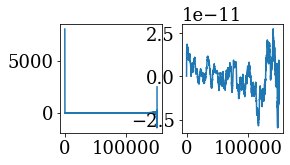

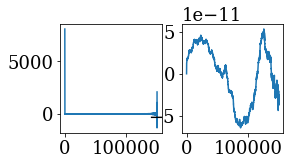

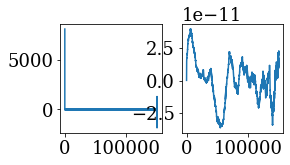

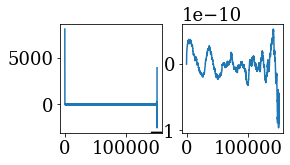

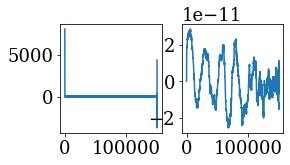

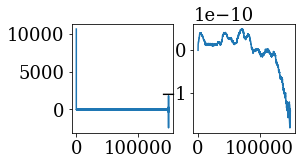

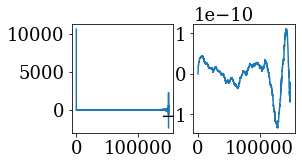

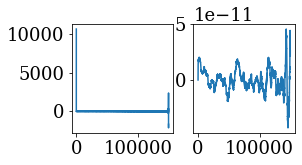

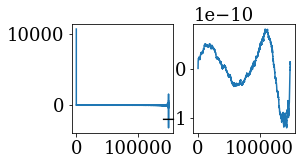

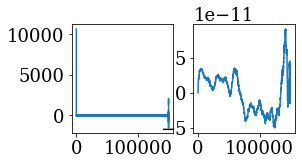

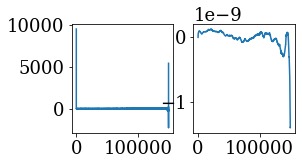

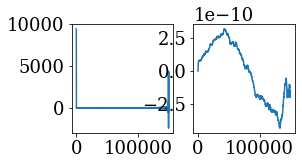

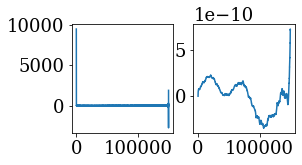

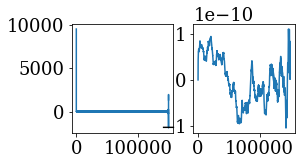

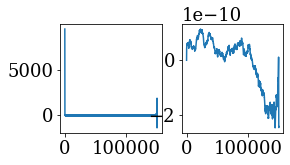

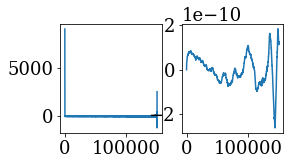

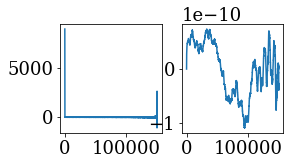

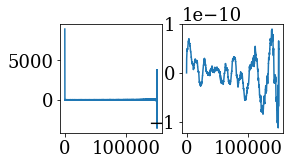

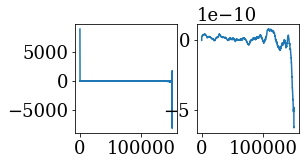

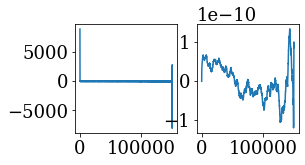

In [8]:
for lipid in lipids:
    for r in range(1,6):
        plt.figure(figsize=(4,2))
        plt.subplot(121)
        plt.plot(data.times, data[lipid+'-r'+str(r)+'-auto'])
        plt.subplot(122)
        plt.plot(data.times, data[lipid+'-r'+str(r)+'-visc'])
        plt.show()

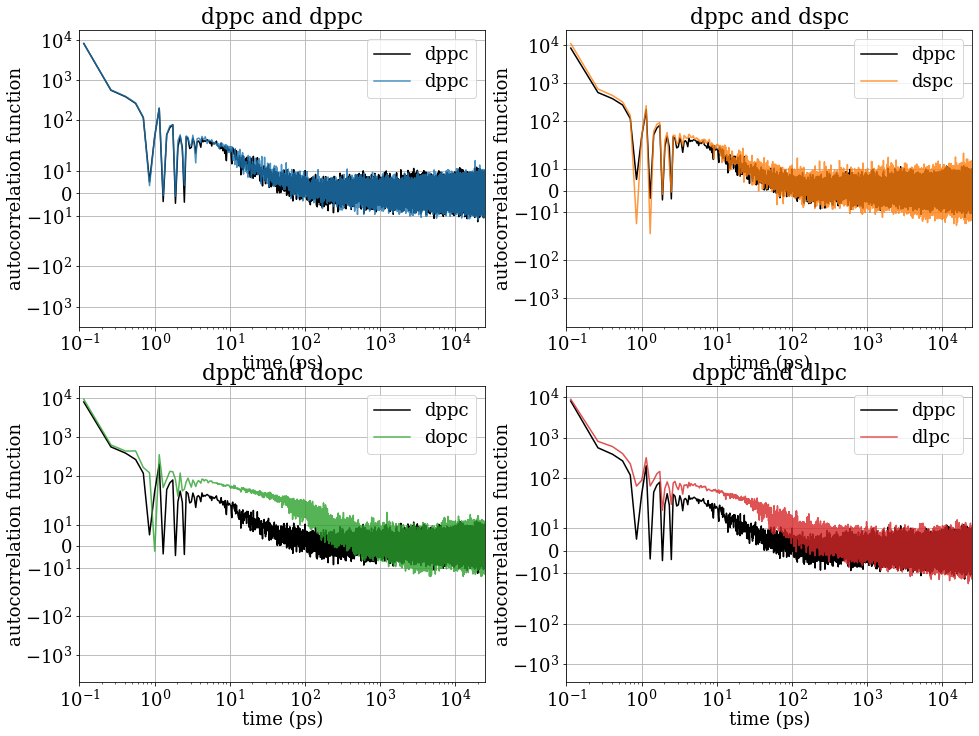

In [9]:
plt.figure(figsize=(16,12))
for l, lipid in enumerate(lipids):
    plt.subplot(2,2,l+1)
    plt.title('dppc and '+lipid)
    plt.plot(data.times+0.1, data['dppc-r2-auto'], c='k', label = 'dppc')
    plt.plot(data.times+0.1, data[lipid+'-r1-auto'], c=f'C{l}', label = lipid, alpha=0.8)
    
#     plt.xlim(0,700000)
    
    ### Lin Y #########
#     plt.ylim(-0.3e-10,2.5e-10)
    ###################
    
    ### Log Y ##########
#     plt.yscale('log')
#     plt.ylim(5e-12,1e-9)
    ####################

#     plt.legend(loc=1)
    plt.xlabel('time (ps)', labelpad=0)
    plt.ylabel('autocorrelation function', labelpad=0)
    
    plt.legend(loc='upper right')
    plt.xlim(0.1, 25e3)
    plt.xscale('log')
    plt.yscale('symlog', linthreshy = 20)
    plt.grid(True)
plt.show()

In [10]:
tails = {
    "dppc" : "16:0 x 2",
    "dspc" : "18:0 x 2",
    "dopc" : "18:1 x 2",
    "dlpc" : "18:2 x 2",
}

In [11]:
for lipid in lipids:
    data[lipid+'-mean'] = np.mean(data.filter(regex=lipid+'-r.-visc'),axis=1)
    data[lipid+'-std'] = np.std(data.filter(regex=lipid+'-r.-visc'),axis=1)

In [12]:
data['dppc-std']

0          6.032578e-16
1          6.369219e-15
2          9.662838e-15
3          1.380981e-14
4          1.618755e-14
               ...     
1013509    2.314822e-11
1013510    2.352714e-11
1013511    2.387621e-11
1013512    2.437133e-11
1013513    2.507245e-11
Name: dppc-std, Length: 1013514, dtype: float64

dppc
	r 1
	r 2
	r 3
	r 4
	r 5
dspc
	r 1
	r 2
	r 3
	r 4
	r 5
dopc
	r 1
	r 2
	r 3
	r 4
	r 5
dlpc
	r 1
	r 2
	r 3
	r 4
	r 5


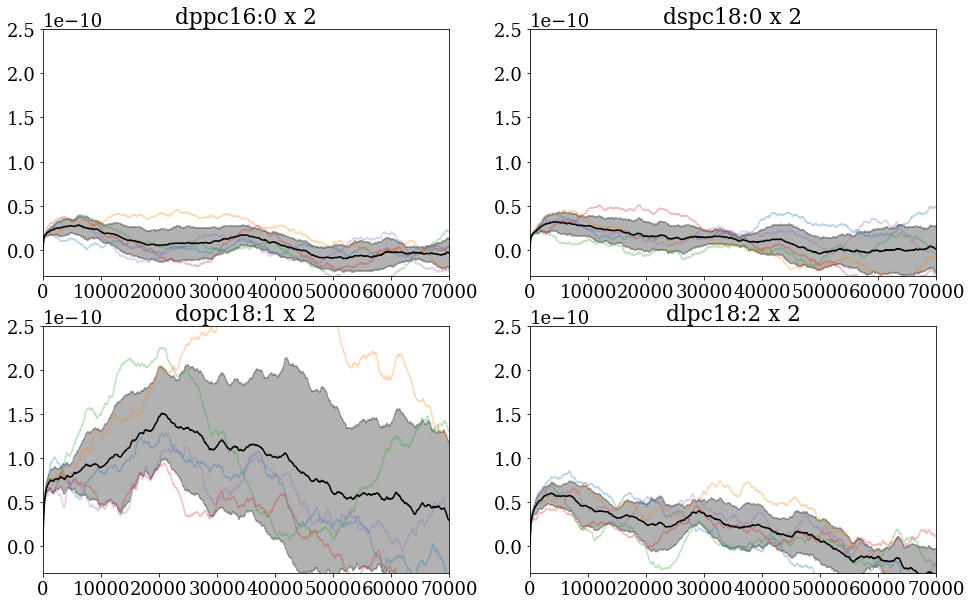

In [13]:
plt.figure(figsize=(16,10))
for l, lipid in enumerate(lipids):
    print(lipid)
    plt.subplot(2, 2, l+1)
    plt.title(lipid+tails[lipid])
    for r in range(1,6):
        print('\tr',r)
        plt.plot(data.times, data[lipid+'-r'+str(r)+'-visc'], alpha=0.3, label=f'r{r}')
    plt.plot(data.times, data[lipid+'-mean'], c='k', alpha=1)
    plt.fill_between(x = data.times,
                     y1 = data[lipid+'-mean']+data[lipid+'-std'],
                     y2 = data[lipid+'-mean']-data[lipid+'-std'],
                     color = 'k', alpha=0.3
                    )
    
    plt.xlim(0,70000)
    
    ### Lin Y #########
    plt.ylim(-0.3e-10,2.5e-10)
    ###################
    
    ### Log Y ##########
#     plt.yscale('log')
#     plt.ylim(5e-12,1e-9)
    ####################

#     plt.legend(loc=1)
plt.show()

## d\*pc averaging window

In [14]:
print(data['times'][1]-data['times'][0])

0.148


In [15]:
data['times'][np.ceil(20000/0.148)]

20000.142

In [54]:
thislipid = 'dlpc'
peak_index = np.argmax(data[thislipid+'-mean'][0:int(50000/0.148)])

In [55]:
print('the maximum of',thislipid,'mean is at STEP NUMBER:')
print(peak_index)

the maximum of dlpc mean is at STEP NUMBER:
24631


In [56]:
quick_mean = data[thislipid+'-mean']
quick_std = data[thislipid+'-std']

leftl = 0
leftr = peak_index

rightl = peak_index
rightr = peak_index*3

skipping = 2000

sems = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/skipping*2
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/skipping
        )
    )
))

means = np.zeros_like(sems)

print(sems.shape)

for i, start in enumerate(range(leftl, leftr, skipping//2)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if i==0: print('\tj:', j, stop)
        if start < stop:
            stat = DescrStatsW(quick_mean[start:stop])     #, weights=fast_psm_sem[start:stop]**(-2))
            sems[i,j] = stat.std/(stop-start)**1
            means[i,j] = stat.mean
#     if i%7==0:
    print('i:', i, start)

means = np.ma.masked_equal(means, 0)
sems = np.ma.masked_equal(sems, 0)


(25, 25)
	j: 0 24631
	j: 1 26631
	j: 2 28631
	j: 3 30631
	j: 4 32631
	j: 5 34631
	j: 6 36631
	j: 7 38631
	j: 8 40631
	j: 9 42631
	j: 10 44631
	j: 11 46631
	j: 12 48631
	j: 13 50631
	j: 14 52631
	j: 15 54631
	j: 16 56631
	j: 17 58631
	j: 18 60631
	j: 19 62631
	j: 20 64631
	j: 21 66631
	j: 22 68631
	j: 23 70631
	j: 24 72631
i: 0 0
i: 1 1000
i: 2 2000
i: 3 3000
i: 4 4000
i: 5 5000
i: 6 6000
i: 7 7000
i: 8 8000
i: 9 9000
i: 10 10000
i: 11 11000
i: 12 12000
i: 13 13000
i: 14 14000
i: 15 15000
i: 16 16000
i: 17 17000
i: 18 18000
i: 19 19000
i: 20 20000
i: 21 21000
i: 22 22000
i: 23 23000
i: 24 24000


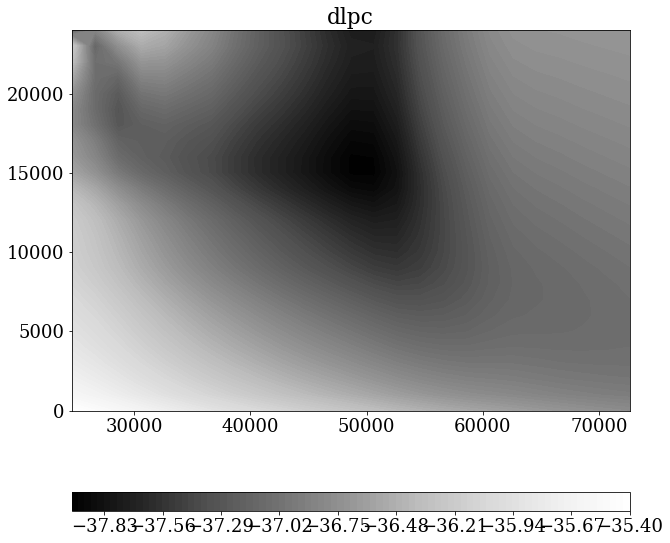

In [57]:
# levels = 6

lefts = np.arange(leftl, leftr, skipping//2)
rights = np.arange(rightl, rightr, skipping)

plt.figure(figsize=(10, 10))
plt.title(thislipid)

# plt.contourf(x, y, means, cmap='Greys_r', levels = 30)
# plt.colorbar(orientation = 'horizontal', aspect=30)

plt.contourf(rights, lefts, np.log(sems), cmap='Greys_r', levels = 100)
plt.colorbar(orientation = 'horizontal', aspect=30)

plt.show()

15 13


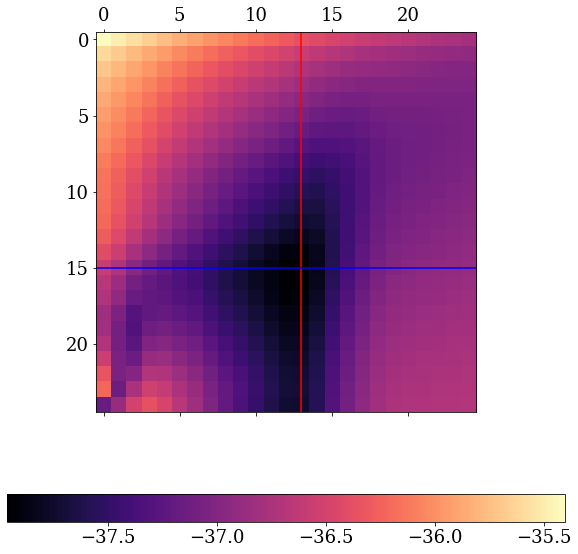

In [58]:
bestleft, bestright = np.unravel_index(np.argmin(sems, axis=None), sems.shape)
print(bestleft, bestright)

plt.figure(figsize=(10,10))

plt.matshow(np.log(sems), cmap='magma', fignum=0)
plt.colorbar(orientation = 'horizontal')

plt.axvline(bestright, c='r')
plt.axhline(bestleft,  c='b')

plt.show()

(-1e-11, 2e-10)

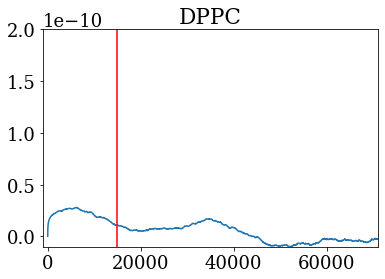

In [59]:
plt.plot(data.times, data['dppc-mean'])
plt.title('DPPC')
plt.axvline(data.times[len(data.times)//10], c='r')


plt.xlim(-1000,71000)
plt.ylim(-0.1e-10,2e-10)

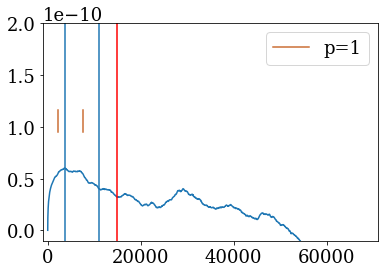

In [61]:
plt.plot(data.times, data[thislipid+'-mean'])

# plt.axvline(data.times[lefts[41]], ymin=0, ymax = 0.1, c='#f34648', label='p=0, 0.5')
# plt.axvline(data.times[rights[0]], ymin=0, ymax = 0.1, c='#f34648')

plt.axvline(data.times[lefts[15]], ymin=0.5, ymax = 0.6, c='#cb6d32', label='p=1')
plt.axvline(data.times[rights[13]], ymin=0.5, ymax = 0.6, c='#cb6d32')

# plt.axvline(data.times[lefts[12]], ymin=0.2, ymax = 0.3, c='#9e8431', label='p=1.5')
# plt.axvline(data.times[rights[21]], ymin=0.2, ymax = 0.3, c='#9e8431')

plt.axvline(data.times[peak_index])
plt.axvline(data.times[min([peak_index*3])])
plt.axvline(data.times[len(data.times)//10], c='r')


plt.xlim(-1000,71000)
plt.ylim(-0.1e-10,2e-10)

plt.legend(loc='upper right')

In [62]:
print(f'{np.mean(data[thislipid+"-mean"][lefts[12]:rights[21]]):0.3e}')

5.462e-11


In [63]:
print('dppc: 2.790e-11 Pa•m•s') 
print('dspc: 2.910e-11')
print(len(data['times']), data['times'][1013513])

dppc: 2.790e-11 Pa•m•s
dspc: 2.910e-11
1013514 149999.938


# from the PSM, DMPC runs

In [ ]:
dmpc_box_heights = np.array([
    8.34509,
    8.34523,
    8.34752,
    8.34669,
    8.34643
])*1e-9


dmpc_thicknesses = np.array([
    3.7992538071065995e-09, 
    3.8016395939086296e-09,
    3.7984365482233506e-09,
    3.799421319796955e-09,
    3.799974619289341e-09
])


psm_box_heights = np.array([
    10.81383,
    10.92187,
    10.87193,
    10.84212,
    10.87406
])*1e-9

psm_thicknesses = np.array([
    4.239971486761711e-09,
    4.268120162932791e-09,
    4.257152749490834e-09,
    4.24712016293279e-09,
    4.260714867617108e-09
])

$$
\eta_{mem}^{2d} = \frac{H}{h}\eta_{out} - (H-h)\left\{\eta_w^{3d}(T)\right\}
$$

In [ ]:
test_in = np.load('../psm/r1/py_output.npz')

In [ ]:
test_in.f.arr_0

In [ ]:
def watervisc(T):
    """
    Given a temperature in Kelvin, returns a volumetric water viscosity (Pa. sec.)
    """
    return(0.02585147 / (T-214.545586))

In [ ]:
watervisc(329), watervisc(311)

In [ ]:
psm = pd.DataFrame()

times = test_in.f.arr_1

psm_temperature = 329

for r in range(5):
    filename = f'../psm/r{r+1}/py_output.npz'
    temp = np.load(filename)
    psm['r'+str(r+1)+'-auto'] = np.array(temp.f.arr_2) / 1.6e-14 * 2e-15
    psm['r'+str(r+1)+'-visc'] = (
        np.array(temp.f.arr_3)  * psm_box_heights[r]/psm_thicknesses[r]
        - (psm_box_heights[r]-psm_thicknesses[r])*watervisc(psm_temperature)
    ) / 1.6e-14 * 2e-15
psm

In [ ]:
dmpc8 = pd.DataFrame()
dmpctemp = np.load('../dmpc-8nm/r1/py_output.npz')

dimes = dmpctemp.f.arr_1

dmpc_temperature = 311

# water correction, stepsize correction

for r in range(5):
    filename = f'../dmpc-8nm/r{r+1}/py_output.npz'
    temp = np.load(filename)
    dmpc8['r'+str(r+1)+'-auto'] = np.array(temp.f.arr_2) / 1.6e-14 * 2e-15
    dmpc8['r'+str(r+1)+'-visc'] = (
        np.array(temp.f.arr_3)  * dmpc_box_heights[r]/dmpc_thicknesses[r]
        - (dmpc_box_heights[r]-dmpc_thicknesses[r])*watervisc(dmpc_temperature)
    ) / 1.6e-14 * 2e-15
dmpc8

In [ ]:
max([1,5,3,9348])

In [ ]:
dmpctemp.f.arr_0

In [ ]:
times.size

In [ ]:
dimes.size

In [ ]:
psm['mean'] = np.mean([
    psm['r1-visc'], psm['r2-visc'], psm['r3-visc'], psm['r4-visc'], psm['r5-visc'],
], axis=0)

psm['sem'] = stats.sem([
    psm['r1-visc'], psm['r2-visc'], psm['r3-visc'], psm['r4-visc'], psm['r5-visc'],
], axis=0)

In [ ]:
dmpc8['mean'] = np.mean([
    dmpc8['r1-visc'], dmpc8['r2-visc'], dmpc8['r3-visc'], dmpc8['r4-visc'], dmpc8['r5-visc'],
], axis=0)

dmpc8['sem'] = stats.sem([
    dmpc8['r1-visc'], dmpc8['r2-visc'], dmpc8['r3-visc'], dmpc8['r4-visc'], dmpc8['r5-visc'],
], axis=0)

In [ ]:
plt.figure(figsize = (22,10))
# for r in range(5):
#     plt.plot(times/1e3, psm[f'r{r+1}-visc'], c='C0', alpha=0.1)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, psm['mean'], c='C0', linewidth=5, label='psm')
plt.fill_between(times/1e3, y1=psm['mean']+psm['sem'], y2=psm['mean']-psm['sem'], color='C0', alpha=0.2)

plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

plt.ylim(0,1e-9)
# plt.ylim(0,18e-11) #andrew's limits

plt.xlim(0, 50)

plt.axvline(x=times[24806]*1e-3, c='blue')
plt.axvline(x=times[143603]*1e-3, c='blue')

plt.axvline(x=times[9780]*1e-3, c='orange')
plt.axvline(x=times[85184]*1e-3, c='orange')

plt.xlabel("Integration Window $t^\star$ (ns)")
plt.ylabel("Viscosity integral from $t^\star$")
plt.show()

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(times/1e3, psm[f'r1-visc'], c='C0', alpha=0.2, label='Individual Simulation')
for r in range(1, 5):
    plt.plot(times/1e3, psm[f'r{r+1}-visc'], c='C0', alpha=0.2)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, psm['mean'], c='k', linewidth=2, label='Average of all 5')
plt.fill_between(times/1e3, y1=psm['mean']+psm['sem'], y2=psm['mean']-psm['sem'], color='k', alpha=0.2)

# plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

# plt.ylim(0,5e-9)
plt.ylim(0,8e-10)

plt.xlim(0, 60)

plt.axvline(x=times[24806]*1e-3, c='red', label = 'Averaging Region')
plt.axvline(x=times[143603]*1e-3, c='red')

# plt.axvline(x=times[9780]*1e-3, c='orange')
# plt.axvline(x=times[85184]*1e-3, c='orange')
plt.title('PSM')
plt.legend(loc="lower right", fontsize = 13)
plt.xlabel("Integration Window $t^\star$ (ns)", size = 16)
plt.ylabel("Viscosity up to $t^\star$ (Pa•m•s)", size = 16)
plt.show()

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(times/1e3, dmpc8[f'r1-visc'], c='C0', alpha=0.2, label='Individual Simulation')
for r in range(1, 5):
    plt.plot(times/1e3, dmpc8[f'r{r+1}-visc'], c='C0', alpha=0.2)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, dmpc8['mean'], c='k', linewidth=2, label='Average of all 5')
plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='k', alpha=0.2)

# plt.ylim(0,5e-9)
plt.ylim(0,2e-10)

plt.xlim(0, 40)
# plt.xscale('log')

plt.axvline(x=times[9780]*1e-3, c='red', label = 'Averaging Region')
plt.axvline(x=times[85184]*1e-3, c='red')

plt.title('DMPC')
plt.legend(loc="lower right", fontsize = 13)
plt.xlabel("Integration Window $t^\star$ (ns)", size = 16)
plt.ylabel("Viscosity up to $t^\star$ (Pa•m•s)", size = 16)
plt.show()

In [ ]:
dval = np.mean(dmpc8['mean'][9780:85184])
dunc = np.std(dmpc8['mean'][9780:85184])
pval = np.mean(psm['mean'][24806:143603])
punc = np.std(psm['mean'][24806:143603])

print(f'PSM: {pval*1e11:0.1f}±{punc*1e11:0.1f} x10^-11 Pa.m.s')
print(f'DMPC: {dval*1e11:0.1f}±{dunc*1e11:0.1f} x10^-11 Pa.m.s')

In [ ]:
plt.errorbar(x = [0,1], 
             y = [np.mean(dmpc8['mean'][13000:60619]), np.mean(dmpc8['mean'][10000:85619])],
             yerr=[np.std(dmpc8['mean'][13000:60619]), np.std(dmpc8['mean'][10000:85619])]
            )
# plt.ylim(0,1.4e-10)

In [ ]:
plt.figure(figsize = (22,10))
for r in range(5):
    plt.plot(times/1e3, psm[f'r{r+1}-visc'], c='C0', alpha=1)
    plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=1)
    
# plt.plot(times/1e3, psm['mean'], c='C0', linewidth=5, label='psm')
# plt.fill_between(times/1e3, y1=psm['mean']+psm['sem'], y2=psm['mean']-psm['sem'], color='C0', alpha=0.2)

# plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

# # plt.ylim(0,5e-9)
# plt.ylim(0,70e-11) #andrew's limits

# plt.xlim(0, 200)

# plt.axvline(x=8, c='lime')
# plt.axvline(x=29.8, c='lime')

# plt.axhline(y=(48.8-1.2)*1e-11, c='blue', label = "Andrew PSM")
# plt.axhline(y=(48.8+1.2)*1e-11, c='blue')

# plt.axhline(y=(12.26-0.5)*1e-11, c='red', label = "Andrew D*PC")
# plt.axhline(y=(19.68+0.69)*1e-11, c='red')


# plt.legend(loc='upper right')

# plt.xlim(1e-3,0.25)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5e-12,1e-9)

plt.xlabel("Integration Window $t^\star$ (ns)")
plt.ylabel("Viscosity integral from $t^\star$")
plt.show()

In [ ]:
avgstart = 8000
avgend = 30000
# temp_p = DescrStatsW(fast_psm_mean[start:stop], weights=fast_psm_sem[start:stop]**(-2))
#         temp_d = DescrStatsW(fast_dmpc_mean[start:stop], weights=fast_dmpc_sem[start:stop]**(-2))
#         psm_sems[i,j] = temp_p.std_mean
#         psm_means[i,j] = temp_p.mean
#         dmpc_sems[i,j] = temp_d.std_mean
#         dmpc_means[i,j] = temp_d.mean

psm_visc = DescrStatsW(psm['mean'][avgstart:avgend], weights = psm['sem'][avgstart:avgend]**-2)
print(f'({psm_visc.mean*1e11:0.3f} ± {psm_visc.std*1e11:0.3f})', 'x10^-11 Pa.m.s')

dmpc8_visc = DescrStatsW(dmpc8['mean'][avgstart:avgend], weights = dmpc8['sem'][avgstart:avgend]**-2)
print(dmpc8_visc.mean, ' ± ', dmpc8_visc.std)

In [ ]:
fast_psm_mean = psm['mean']
fast_psm_sem = psm['sem']
fast_dmpc_mean = dmpc8['mean']
fast_dmpc_sem = dmpc8['sem']

# plateau-search based on standard deviation:
linear fit doesn't really work

In [ ]:
leftl = 9775
leftr = 9785
#dmpc max step: 20619
#psm max step: 51547

rightl = 85180
rightr = 85190
#206186

skipping = 1

psm_sems = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/skipping
        )
    )
))

psm_means = np.zeros_like(psm_sems)
dmpc_sems = np.zeros_like(psm_sems)
dmpc_means = np.zeros_like(psm_sems)

print(psm_sems.shape)

for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if i==0: print('\tj:', j, stop)
        if start < stop:
            temp_p = DescrStatsW(fast_psm_mean[start:stop])     #, weights=fast_psm_sem[start:stop]**(-2))
            temp_d = DescrStatsW(fast_dmpc_mean[start:stop])    #, weights=fast_dmpc_sem[start:stop]**(-2))
            psm_sems[i,j] = temp_p.std_mean
            psm_means[i,j] = temp_p.mean
            dmpc_sems[i,j] = temp_d.std_mean
            dmpc_means[i,j] = temp_d.mean
#     if i%7==0:
    print('i:', i, start)
    
for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if start>=stop:
            psm_sems[i,j] = np.mean(psm_sems)
            psm_means[i,j] = np.mean(psm_means)
            dmpc_sems[i,j] = np.mean(dmpc_sems)
            dmpc_means[i,j] = np.mean(dmpc_means)
for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if start>=stop:
            psm_sems[i,j] = np.mean(psm_sems)
            psm_means[i,j] = np.mean(psm_means)
            dmpc_sems[i,j] = np.mean(dmpc_sems)
            dmpc_means[i,j] = np.mean(dmpc_means)

In [ ]:
levels = 6

# plt.figure(figsize=(14, 14))
# # plt.subplot(121)
# plt.title('psm')
# plt.contour(psm_sems, cmap='magma', levels = levels)
# # plt.imshow(psm_sems, cmap='magma')
# plt.colorbar(orientation = 'horizontal', aspect=30)
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(14, 8))
# # plt.subplot(121)
# plt.title('dmpc')
# plt.contour(dmpc_sems, cmap='magma', levels = levels)
# # plt.imshow(psm_sems, cmap='magma')
# plt.colorbar(orientation = 'horizontal', aspect=30)
# plt.grid(True)
# plt.show()

plt.figure(figsize=(14, 8))
# plt.subplot(121)
plt.title('dmpc')
plt.contourf(dmpc_means, cmap='viridis', levels = levels)
# plt.colorbar(orientation = 'horizontal', aspect=30)
plt.contour(dmpc_sems, cmap='magma', levels = levels)
# plt.imshow(psm_sems, cmap='magma')
# plt.colorbar(orientation = 'horizontal', aspect=30)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

plt.ylim(1.42e-10, 1.43e-10)

plt.xlim(3.8,4.2)


# plt.xlabel("Integration Window $t^\star$ (ns)")
# plt.ylabel("Viscosity integral from $t^\star$")
plt.show()

In [ ]:
looking_ns = 4
for t, time in enumerate(times):
    test = np.absolute(time - looking_ns*1e3)
    if test<0.5:
        print(t, time)

In [ ]:
# thing = np.polyfit(times[leftl:rightr], fast_psm_mean[leftl:rightr], 1, cov=True)

In [ ]:
# print(thing)
# print(thing[0][0])
# print(thing[1][0,0])

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('psm')
plt.imshow(np.log10(psm_z), cmap='magma')
# plt.contour(dmpc_sems, cmap='magma', levels = levels)
plt.colorbar(orientation = 'horizontal', aspect=30)

plt.subplot(122)
plt.title('dmpc')
plt.imshow(np.log10(dmpc_z), cmap='magma')
# plt.contour(dmpc_sems, cmap='magma', levels = levels)
plt.colorbar(orientation = 'horizontal', aspect=30)
plt.show()

# plateau-search based on minimizing weighted standard error of the mean

In [ ]:
print(times[74504], times[142368])

In [ ]:
plt.figure(figsize = (22,10))
for r in range(5):
    plt.plot(times/1e3, psm[f'r{r+1}-auto']**2, '.-', c='C0', label='psm')
    plt.plot(dimes/1e3, dmpc8[f'r{r+1}-auto']**2, '.-' , c='C1', label = 'dmpc')
    
plt.legend(loc='upper right')
plt.xlim(0,0.01)
plt.ylim(1e1,1e7)
plt.yscale('log')

In [ ]:
plt.figure(figsize = (22,10))
for r in range(5):
    plt.plot(times/1e3, psm[f'r{r+1}-auto'], c='C0', alpha=0.2)
    plt.plot(dimes/1e3, dmpc8[f'r{r+1}-auto'], c='C1', alpha=0.2)
    
plt.xlim(-.1,10)
plt.ylim(-3,5)
# plt.yscale('log')

In [ ]:
leftl = 0
leftr = 206186

rightl = 2578
rightr = 206186



skipping = 55000

psm_slopes = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/skipping
        )
    )
))

psm_z = np.zeros_like(psm_slopes)
psm_sig = np.zeros_like(psm_slopes)
dmpc_slopes = np.zeros_like(psm_slopes)
dmpc_z = np.zeros_like(psm_slopes)
dmpc_sig = np.zeros_like(psm_slopes)

print(psm_slopes.shape)

print('\tJjJjJjJjJjJjJj')
for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if i==0: print('\t', j, stop)
        if start+6000 < stop:
            temp_p = np.polyfit(times[start:stop], fast_psm_mean[start:stop], 1, cov=True, w=fast_psm_sem[start:stop]*-1)
            temp_d = np.polyfit(dimes[start:stop], fast_dmpc_mean[start:stop], 1, cov=True, w=fast_dmpc_sem[start:stop]*-1)
            
            psm_slopes[i,j] = temp_p[0][0]
#             psm_slopes[j,i] = psm_slopes[i,j]

            psm_sig[i,j] = temp_p[1][0,0] 
    
            psm_z[i,j] = np.abs(temp_p[0][0]/temp_p[1][0,0]) 
#             psm_z[j,i] = psm_z[i,j]
            
            dmpc_slopes[i, j] = temp_d[0][0]
#             dmpc_slopes[j, i] = dmpc_slopes[i, j]
            
            dmpc_z[i,j] = np.abs(temp_d[0][0]/temp_d[1][0,0])
            dmpc_sig[i,j] = temp_d[1][0,0]
#             dmpc_z[j,i] = dmpc_z[i,j]
#     psm_z[i, i] = np.mean(psm_z[i, i:])
#     dmpc_z[i, i] = np.mean(dmpc_z[i, i:])
    print(i, start)


In [ ]:
psm[f'r1-auto'][0], dmpc8[f'r1-auto'][0]

In [ ]:
plt.figure(figsize = (6,5))
l = 5 
lipid = 'dppc'
scolor = 'C'+str(l)
for r in range(5):
    vals = data[lipid+'-r'+str(r+1)+'-visc']
    uncs = data[lipid+'-r'+str(r+1)+'-visc-unc']
    plt.plot(x, vals, ',',c='C0')
    plt.fill_between(x, y1=vals+uncs, y2=vals-uncs, alpha=0.1, color='C0')
plt.title('DPPC, 5 trials')
plt.ylim(-0.5e-9,1.5e-9)
plt.xscale('log', subsx=[2, 3, 4, 5, 6, 7, 8, 9])
plt.axvline(minerr, ls='--', c='black')
plt.xlabel("Integration Window $t^\star$ (s)")
plt.minorticks_on()
plt.ylabel("Viscosity integral from $t^\star$")

# plt.tight_layout()
plt.show()

In [ ]:
dppc_avg = np.average([
    data['dppc-r1-visc'],
    data['dppc-r2-visc'],
    data['dppc-r3-visc'],
    data['dppc-r4-visc'],
    data['dppc-r5-visc']], axis = 0)

dppc_sem = sp.stats.sem([
    data['dppc-r1-visc'],
    data['dppc-r2-visc'],
    data['dppc-r3-visc'],
    data['dppc-r4-visc'],
    data['dppc-r5-visc']], axis = 0)


In [ ]:
# plt.figure(figsize=(12,7))
x = sp.arange(0, 176000, 2)
plt.plot(x*1e-3, data['dppc-r1-visc']*11/3.78, 'C0', lw=1, alpha=0.5, label='Individual Simulation')
for r in range(2,6):
    plt.plot(x*1e-3, data[f'dppc-r{r}-visc']*11/3.78, 'C0', lw=1, alpha=0.5)


plt.plot(x*1e-3, dppc_avg*11/3.78, 'k', lw=3, label='Average of all 5')
plt.fill_between(x*1e-3, (dppc_avg+dppc_sem)*11/3.78,
                 (dppc_avg-dppc_sem)*11/3.78, alpha=0.2, color='k')
plt.ylim(0, 1e-9)
plt.xlim(-0.1,20)

# plt.axhline(1e-10, ls='--', color='k')
plt.title('DMPC 312K\nSampling Rate: 2ps')
# # plt.xscale('log')

# plt.axvline(3000, c='r', label='Averaging Region')
# plt.axvline(10000, c='r')

plt.ylabel('Viscosity (Pa.m.s)', fontsize=16)
# plt.legend(fontsize=12, loc=1)
plt.xlabel('$t^*$ (ns)', fontsize=16)


# plt.grid(False)
plt.show()

In [ ]:
# sp.array(data[lipid+'-r'+str(r+1)+'-visc'])

# roll-unc
I've realized I calculated the rolling uncertainties slightly incorrectly.\
I can fix that using the other columns that I have though, so that's cool.\
$$s_{wtd} = \sqrt{\left(    \frac{\sum_{i=1}^n w_ix_i^2}{\sum_{i=1}^n w_i} - \left(    \bar x_{wtd}    \right)^2   \right)\frac{1}{n-1}}$$

In [ ]:
print('This is no longer needed')
# import time
# lipids1 = ['dopc-293','dopc-303','dopc-313','dopc-323','dmpc','dppc','sopc','popc']
# for lipid in lipids1:
#     for r in range(5):
#         visc = sp.array(data[lipid+'-r'+str(r+1)+'-visc'])
#         print('v')
#         weights = sp.array(data[lipid+'-r'+str(r+1)+'-visc-unc']**(-2))
#         print('w')
#         start = time.time()
#         data[lipid+'-r'+str(r+1)+'-roll-unc'][2:] = sp.array([
#             (
#                 (
#                     sp.add(sp.average(visc[:n]**2, weights=weights[:n]),
#                     - sp.average(visc[:n], weights = weights[:n])**2)
#                 )
# #                 / (n-1)
#             )**(1/2)
#             for n in range(2, len(visc))
#         ])
#         end = time.time()
#         print(end - start)
#         print(lipid,r)

In [ ]:
for lipid in lipids:
    for r in range(5):
        data[lipid+'-r'+str(r+1)+'-roll-unc'][0:2] = data[lipid+'-r'+str(r+1)+'-roll-unc'][2]

In [ ]:
plt.figure(figsize = (16,6))
y1 = data[lipid+'-r'+str(r+1)+'-roll-unc']
y2 = sp.arange(1,len(y1)+1)
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        y1 = data[lipid+'-r'+str(r+1)+'-roll-unc']
        plt.plot(x, y1/y2**(1/2), c=scolor)
    plt.title('Rolling-uncertainty')
#     plt.ylim(5e-14, 2.1e-11)
#     plt.xscale('log')
#     plt.yscale('log')
    plt.axvline(minerr, ls='--', c='black')
plt.show()

In [ ]:
y1 = data[lipid+'-r1-roll-unc']
y2 = sp.arange(1,len(y1)+1)



adding = sp.zeros_like(y1)


for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    for r in range(5):
        adding += data[lipid+'-r'+str(r+1)+'-roll-unc']**2
        
plt.figure(figsize = (6,5))

plt.title('Combined $\sigma_{\mu}/\sqrt{n}$')
plt.plot(x, (adding/y2)**(0.5))
#     plt.ylim(5e-14, 2.1e-11)
plt.ylabel('Visocity Uncertainty $(10^{-12}$ Pa m s)')
plt.xlabel('Integration Limit (s)')
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()
print('minimum is at $\\tau=$', x[((adding/y2)**(0.5)).idxmin()])

In [ ]:
plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        vals = data[lipid+'-r'+str(r+1)+'-roll']
        errs = data[lipid+'-r'+str(r+1)+'-roll-unc']
        plt.plot(x,vals, ',', c=scolor)
        plt.fill_between(x, vals+errs, vals-errs, color=scolor, alpha=0.1)
    plt.title(lipid)
    plt.axvline(minerr, ls='--', c='black')
    plt.ylim(1.5e-10,4.2e-10)
    plt.xscale('log')
plt.show()

Once again, that's
$$s_{wtd} = \sqrt{\left(    \frac{\sum_{i=1}^n w_ix_i^2}{\sum_{i=1}^n w_i} - \left(    \bar x_{wtd}    \right)^2   \right)\frac{1}{n-1}}$$

In [ ]:
averaged_viscs = pd.DataFrame()

for lipid in lipids:
    viscs = sp.array([data[lipid+'-r1-roll'], data[lipid+'-r2-roll'], data[lipid+'-r3-roll'],
                      data[lipid+'-r4-roll'], data[lipid+'-r5-roll']])
    weights = sp.array([data[lipid+'-r1-roll-unc'], data[lipid+'-r2-roll-unc'], data[lipid+'-r3-roll-unc'],
                      data[lipid+'-r4-roll-unc'], data[lipid+'-r5-roll-unc']])**(-2)
    averaged_viscs[lipid+'-visc'] = sp.average(viscs, weights=weights, axis=0)
    averaged_viscs[lipid+'-unc'] = (
        (
        sp.sum(weights*viscs**2, axis=0)/sp.sum(weights, axis=0)-averaged_viscs[lipid+'-visc']**2
        )/4
    )**(1/2)
averaged_viscs

In [ ]:
plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    plt.plot(x, averaged_viscs[lipid+'-visc'])
# plt.xlim(1e-8,1e-7)
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.show()



plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    plt.plot(x, averaged_viscs[lipid+'-unc'])
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize = (20,8))
for l, lipid in enumerate(lipids):
    plt.subplot(2,4,l+1)
    vals = averaged_viscs[lipid+'-visc']
    errs = averaged_viscs[lipid+'-unc']
    plt.plot(x,vals, ',', c=scolor)
    plt.fill_between(x, vals+errs, vals-errs, alpha=0.2)
    plt.title(lipid)
    plt.ylim(1.7e-10,2.8e-10)
    plt.xscale('log')
    plt.axvline(minerr, ls='--', c='black')
plt.show()

In [ ]:
plt.figure(figsize = (6,5))
l=0
lipid='dopc-293'

vals = averaged_viscs[lipid+'-visc']
errs = averaged_viscs[lipid+'-unc']
plt.plot(x,vals, ',', c=scolor)
plt.fill_between(x, vals+errs, vals-errs, alpha=0.2)
plt.title(lipid)
# plt.ylim(1.7e-10,2.8e-10)
plt.xscale('log')
plt.xlabel('Integration Limit $t^\star$')
plt.ylabel('Viscosity $\eta(t^\star)$')
plt.axvline(minerr, ls='--', c='black')
plt.show()

In [ ]:
mindex = int(minerr/2e-12)
mindex

$$\eta\propto \frac{V}{T}\int{}$$

In [ ]:
print(lipids)
yvals = sp.array([averaged_viscs[lipid+'-visc'][mindex] for lipid in lipids])
yerrs = sp.array([averaged_viscs[lipid+'-unc'][mindex] for lipid in lipids])
ylabel= 'Viscosity (Pa m s)'

top = 2.8e-10

##################################################

plt.errorbar(x=lipids,y=yvals,yerr=yerrs, ls='', marker='.', ms=12)
plt.xticks(rotation=90)
plt.ylabel(ylabel)
plt.title('All Lipids')
plt.show()

##################################################

templist = [293,303,313,323]
plt.errorbar(x=templist, y=yvals[:4], yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.xticks(templist)
plt.title('DOPC')
plt.ylim(1.9e-10,top)
plt.xlabel('Temperature $K$')
# plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.show()

##################################################

plt.errorbar(x=['DMPC\n14:0', 'DPPC\n16:0'], y=[yvals[4],yvals[5]],
             yerr=[yerrs[4],yerrs[5]], ls='', marker='.', ms=12)
plt.title('Tail Length')
plt.ylim(1.9e-10,top)
plt.errorbar(x=['POPC\n16:0-18:1','SOPC\n18:0-18:1'], y=[yvals[7],yvals[6]],
             yerr=[yerrs[7],yerrs[6]], ls='', marker='.', ms=12)
plt.ylabel(ylabel)
plt.show()

##################################################

plt.errorbar(x=lipids[:4], y=yvals[:4], yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.errorbar(x=[lipids[6],lipids[6]], y =[yvals[6],yvals[6]],
             yerr =[yerrs[6],yerrs[6]], ls='', marker='.', ms=12)
plt.title('DOPC vs SOPC')
plt.ylim(1.9e-10,top)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.show()

##################################################

zero_uns = [4,5]
one_uns = [7,6]
two_uns = [0,1,2,3]

plt.errorbar(x=lipids[zero_uns], y=yvals[zero_uns], yerr=yerrs[zero_uns], ls='', marker='.', ms=12)
plt.errorbar(x=lipids[one_uns], y=yvals[one_uns], yerr=yerrs[one_uns], ls='', marker='.', ms=12)
plt.errorbar(x=lipids[two_uns], y=yvals[two_uns], yerr=yerrs[two_uns], ls='', marker='.', ms=12)
plt.title('Degree of Unsaturation',pad=28)
plt.legend(['Zero','One','Two'])
plt.ylim(1.9e-10,top)
plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.show()



In [ ]:
print(lipids)
fs = 18

tails = [17.9, 18, 18.1, 18.2, 14, 16, 18, 17]
plt.errorbar(x=tails[:4],y=yvals[:4],yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.text(17.55,2.05e-10,'DOPC',fontsize=fs)

plt.errorbar(x=tails[4],y=yvals[4],yerr=yerrs[4], ls='', marker='.', ms=12)
plt.text(13.9,2.1e-10,'DMPC',fontsize=fs)

plt.errorbar(x=tails[5],y=yvals[5],yerr=yerrs[5], ls='', marker='.', ms=12)
plt.text(15.6,2.08e-10,'DPPC',fontsize=fs)

plt.errorbar(x=tails[6],y=yvals[6],yerr=yerrs[6], ls='', marker='.', ms=12)
plt.text(17.15,2.6e-10,'SOPC',fontsize=fs)

plt.errorbar(x=tails[7],y=yvals[7],yerr=yerrs[7], ls='', marker='.', ms=12)
plt.text(16.15,2.5e-10,'POPC',fontsize=fs)

plt.title("Overall Tail Length",pad=20)
plt.ylabel(ylabel)


plt.show()

In [ ]:
print('this was the old thing')
# plt.errorbar(x = newarr[:,0,2], y = sp.average(newarr[:,:,0],axis=1,weights=newarr[:,:,1]**(-2)), 
#              yerr = sp.sum(newarr[:,:,1]**2,axis=1)**(1/2), 
# #              yerr = sp.stats.sem(newarr[:,:,0],axis=1),
#              ls='', marker='.', ms=12, label='Preliminary Results')
# # plt.plot(newarr[:,:,2], newarr[:,:,0],'s',ms=5)

# # plt.ylim(1.7e-10,3e-10)
# plt.errorbar(295,2.39e-10,yerr=1.25e-11, marker='.',ms=10, label='Final Result Expected Uncertainty')
# # plt.suptitle('DOPC viscosities',size=18,y=1.05)
# plt.title('DOPC viscosities',size=18)
# # plt.title('Results from 12% simulation length',size=15)
# plt.xlabel('Temperature (K)',size=16)
# plt.ylabel('Shear Viscosity ($Pa\cdot m\cdot s$)',size=16)
# plt.legend()
# plt.xticks(size=14)
# plt.yticks(size=14)